<a href="https://colab.research.google.com/github/al00pes/deep_learning_/blob/main/MVP_Deep_learning_Arthur_Lopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP Deep learning:**

**Profs : Hugo Villamizar e Patrick Happ**

**Autor:  Arthur Lopes.**

**Linguagem Natural **

**Classificação de frases de noticias do mercado financeiro**



**Resumo do conjunto de dados**

conjunto de dados de sentimento de frases de notícias financeiras consiste em 4.840 frases de notícias financeiras em inglês categorizadas por sentimento. O conjunto de dados é dividido por.

0 - Neutro
1-  Negativo
2 - Positivo





## 1 - Instalando as bibliotecas necessários

In [ ]:
# instalando dependencias
! pip install transformers[torch] datasets evaluate scikit-learn matplotlib

## **2-Carregando a base de dados**

In [60]:
from datasets import load_dataset

dataset = load_dataset("financial_phrasebank","sentences_50agree")

  0%|          | 0/1 [00:00<?, ?it/s]

O dataset é carregado no tipo dicionário e possível apenas 2 atributos que são os frases dos jornalistas ('sentence), classificação delas no atributo ( 'label') e possuí um total de 4846 alinhas, como mostra a acima abaixo.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4846
    })
})

Como o dataset não veio separado com as bases train e test, por mais que são poucos dados, resolvido divido-los. Separei 4000 linhas para o treinamento e 500 linhas para a base de teste, que irei usar para avaliar o meu modelo .

In [ ]:
small_train_dataset = dataset["train"].shuffle(seed=42).select(range(4000))
small_dev_dataset = dataset["train"].shuffle(seed=42).select(range(4000,4050))
small_test_dataset = dataset["train"].shuffle(seed=42).select(range(500))

Como mencionado acima, o dataset possui 3 caracterista que classifica as frase.
essa represetação abaixo mostra as 3 que temos.

In [ ]:
set(dataset["train"]["label"])

{0, 1, 2}

# **3-Importando o modelo**

Nessa etapa, Irei utilizar o modelo BERT-base-cased para treinamento. Esse modelo do BERT que estou usando é o 'cased' , que significa que existe diferenção de letras minuisculas e maíusculas. Também irei realizar a tokenização, Onde ela consistena na divisão de um texto em unidades menores, chamadas de "tokens". Um token pode ser uma palavra, uma subpalavra (como um subpalavra de BPE - Byte Pair Encoding) ou mesmo um caractere individual, dependendo do tipo de tokenização utilizada.

In [ ]:
#importando o modelo do hugging face
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased") # Transformando letras em numeros.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(examples):
  return tokenizer(examples["sentence"], padding="max_length", truncation=True)

tokenized_small_train_dataset = small_train_dataset.map(tokenize_function, batched=True)
tokenized_small_dev_dataset = small_dev_dataset.map(tokenize_function, batched=True)
tokenized_small_test_dataset = small_test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Nessa etapa, estou visualizando um indice da tokenização se que referente ao sentimento " L&T has also made a commitment to redeem the remaining shares by the end of 2011" . Quando ocorre essa tokezição, é adicionado mais alguns atritubos, como o 'input_ids'

In [ ]:

# Visualizando a informação gerada depois da tokenização
tokenized_small_train_dataset[0]

{'sentence': 'L&T has also made a commitment to redeem the remaining shares by the end of 2011 .',
 'label': 1,
 'input_ids': [101,
  149,
  111,
  157,
  1144,
  1145,
  1189,
  170,
  8268,
  1106,
  1894,
  3051,
  1306,
  1103,
  2735,
  6117,
  1118,
  1103,
  1322,
  1104,
  1349,
  119,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

**Nessa etapa, iremos importa o Transformers e também especificar alguns argumentos para o nosso modelo, como :**

output_dir = diretorio onde ficará salvo a saída.

evaluation_strategy =

logging_strategy = 'step' Para os steps em execução

loggin_steps = estipula a quantidade de steps que irá aparecer no treinamento

save_steps = 50 - Argumento para salvar a cada 50 steps executados

load_best_model_at_end = TRue , significa que ele irá escolher o melhor modelo e exibir ao final do treinamento.

metric_for_best_model = 'accurary' - Informando a metrica que será utilizada

greater_for_best_model = TRue - Por estamos avaliando o metrix de acucaria, significa que o melhor desempenho é algo bom, então é para exibi-lo.

Gradient_accumation_stepes=4 , seria um acumulo de gradiante, como se fosse o batch efetivo è o numero de vezes estipulado nessa arumento.

save_total_limit =2, Total de check point que pretende salvar

disable_tqdm=False -> deixa visivel a barra de loading. Se deixar como True, ap irá aparecer somente informações printada.

import evaluate -> serve para importa as metrica

metric = evalute.load('accuracy')

predictions = np.argmax(logits, axis=-1 ( Aqui ele irá gerar um vetor com o maior probalildade de N Posições )








In [ ]:
from transformers import Trainer, TrainingArguments
import numpy as np
import evaluate # modulo para carregar as metricas desejadas

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

MODEL_PATH = "financial's_phrases "

training_args = TrainingArguments(
    output_dir=MODEL_PATH,
    evaluation_strategy="steps", # a cada 10 steps, o treinamento é parado e mostrado o resultado.
    eval_steps=10, # os steps mencionado acima
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=4,
    max_steps=200, #quantidade de steps para ser treinado
    learning_rate=2e-5,
    logging_strategy="steps",
    logging_steps=10,

    save_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    save_total_limit=2,
    disable_tqdm=False
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_small_train_dataset,
    eval_dataset=tokenized_small_dev_dataset,
    compute_metrics=compute_metrics,
)

Nessa etapa, irá rodar o modelo e verificar o desempenho dele no treino.

In [ ]:
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
10,1.017200,1.009293,0.500000
20,0.983300,0.988060,0.500000
30,0.939600,1.009606,0.500000
40,0.922500,0.914734,0.540000
50,0.842100,0.918689,0.560000
60,0.903200,0.926488,0.560000
70,0.807700,0.929137,0.520000
80,0.784500,0.844189,0.560000
90,0.765400,0.886756,0.580000
100,0.754000,0.824744,0.620000


TrainOutput(global_step=200, training_loss=0.7428913354873657, metrics={'train_runtime': 626.8484, 'train_samples_per_second': 10.21, 'train_steps_per_second': 0.319, 'total_flos': 1683925873459200.0, 'train_loss': 0.7428913354873657, 'epoch': 1.6})

Apos o treinamento, podemos observado que obtivemos uma acurácia de 66% com o dado de treino. Mais adiante, iremos rodar o modelo na base de teste e avaliar a eficação da acuracia.

Abaixo, importei o log de treinamento para observar se houver overfitting no momento do treino.

In [ ]:
import pandas as pd

df_log = pd.DataFrame(trainer.state.log_history)
df_log

,loss,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,1.0172,0.000019,0.08,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.08,10,1.009293,0.50,1.6937,29.521,4.133,NaN,NaN,NaN,NaN,NaN
2,0.9833,0.000018,0.16,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.16,20,0.988060,0.50,1.6389,30.509,4.271,NaN,NaN,NaN,NaN,NaN
4,0.9396,0.000017,0.24,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.24,30,1.009606,0.50,1.6514,30.277,4.239,NaN,NaN,NaN,NaN,NaN
6,0.9225,0.000016,0.32,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.32,40,0.914734,0.54,1.6311,30.655,4.292,NaN,NaN,NaN,NaN,NaN
8,0.8421,0.000015,0.40,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,0.40,50,0.918689,0.56,1.6234,30.800,4.312,NaN,NaN,NaN,NaN,NaN


<Axes: >

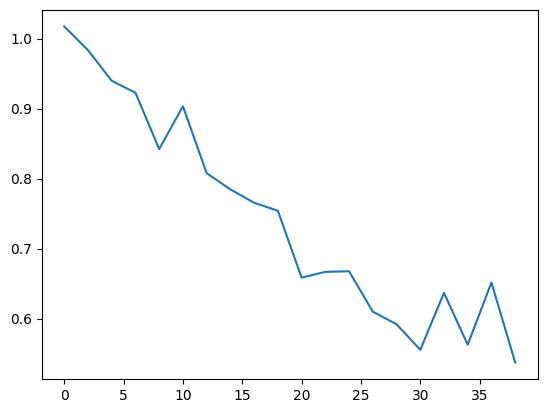

In [ ]:
df_log['loss'].dropna().plot()

<Axes: >

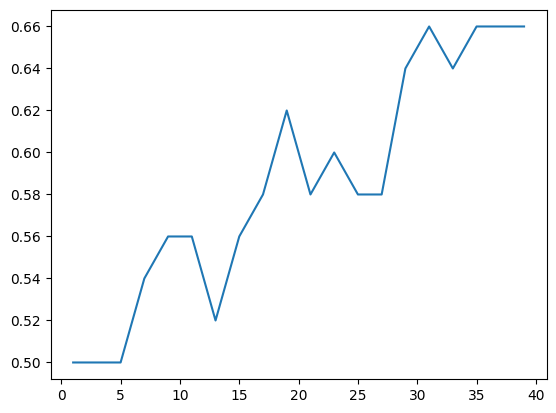

In [ ]:
df_log["eval_accuracy"].dropna().plot()

Até agora essa foi a melhor treinar até o momento, então irei treinar no meus dados de teste e validar realmente o resultado.

Nessa etapa , ele treinar os dados e logo abaixo mostra a acurracy

Se a curva no eva_loss parecer como a Letra U , existe a possibilidade de ter ocorrido overffiting

OBs: Para evitar se overfitting, os dois argumentos para evitar isso, é que a cada 50 steps no (save_steps) ele salva e o load_best_mode_at_end=True, termina qual é o melhor nesse periodo de steps.





In [ ]:

trainer.evaluate(tokenized_small_test_dataset)

{'eval_loss': 0.5502206087112427,
 'eval_accuracy': 0.76,
 'eval_runtime': 16.7102,
 'eval_samples_per_second': 29.922,
 'eval_steps_per_second': 3.77,
 'epoch': 1.6}

Como os dados de test, a acurácio teve um desempenho um pouco melhor do que com o dados de treino e obte uma acurária de 76%.

# **4 - Finalização e execução do modelo salvo**

In [ ]:
trainer.save_model(MODEL_PATH)
tokenizer.save_pretrained(MODEL_PATH)

('Financias /tokenizer_config.json',
 'Financias /special_tokens_map.json',
 'Financias /vocab.txt',
 'Financias /added_tokens.json',
 'Financias /tokenizer.json')

In [55]:
import torch.nn.functional as F
import torch

model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)

text = "Pharmaceuticals group Orion Corp reported a fall in its third-quarter earnings that were hit by larger expenditures on R&D and marketing "

encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input)
probs = F.softmax(output.logits, dim=1)
pred = torch.argmax(probs, dim=1)
print(probs)
pred

tensor([[0.3964, 0.0793, 0.5243]], grad_fn=<SoftmaxBackward0>)


tensor([2])

In [62]:
text = "Net sales increased to EUR193 .3 m from EUR179 .9 m and pretax profit rose by 34.2 % to EUR43 .1 m. ( EUR1 = USD1 .4 )"

encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input)
probs = F.softmax(output.logits, dim=1)
pred = torch.argmax(probs, dim=1)
print(probs)
pred

tensor([[0.5012, 0.0484, 0.4505]], grad_fn=<SoftmaxBackward0>)


tensor([0])

# **5 - Conclusão**

Utilizei a metrica de acurárica para melhor determinar esse problema, pois no meu ponte de vista, até o mesmo, é uma metrica menos complexa para se trabalhar. Nesse problema em questão , tive bastante dificuldade para entender os argumento que precisava ser utilizado no modelo para fazer o treinamento, Diferente da Materia de Machine Learning. Acredito que posso melhor ainda mais esse modelo ajustando cada vez mais os parâmetros, pois precisei limitar alguns argumentos por conta de não ter um GPU no colab, mas sei que posso melhor de outras formas, utilizando maquinas fisica. Acredito que não tive um bom desempenho nesse projeto, porém consegui mostrar um pouco do que conseguir entender durante as ótimas aulas que tive.
